In [6]:
%matplotlib notebook
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import seaborn as sns
#import folium
#from folium.plugins import MarkerCluster
from sklearn import preprocessing

In [ ]:
def problem1(filename,field):
    departments= pd.read_excel(filename, sheet_name="departments")
    people= pd.read_excel(filename, sheet_name="people")
    fields= pd.read_excel(filename, sheet_name="fields")
    
    df=pd.merge(pd.merge(people, departments, on='dep_code', how='left'),fields,on="area_code",how="left")
    #field="geography"
    df=df[df["field"]==field]
    from folium.plugins import MarkerCluster


    m = folium.Map(location=[df.iloc[0,3], df.iloc[0,4]], zoom_start=11)
    
    marker_cluster = MarkerCluster().add_to(m)
    
    for i in range(df.shape[0]):
        folium.Marker(
            location=[df.iloc[i,3], df.iloc[i,4]],
            popup=folium.Popup(df.iloc[i,0]),
            #icon=folium.Icon(color='green', icon='ok-sign'),
        ).add_to(marker_cluster)
        
    return(m)
    
problem1("sample_faculty.xlsx","geography")

<IPython.core.display.Javascript object>


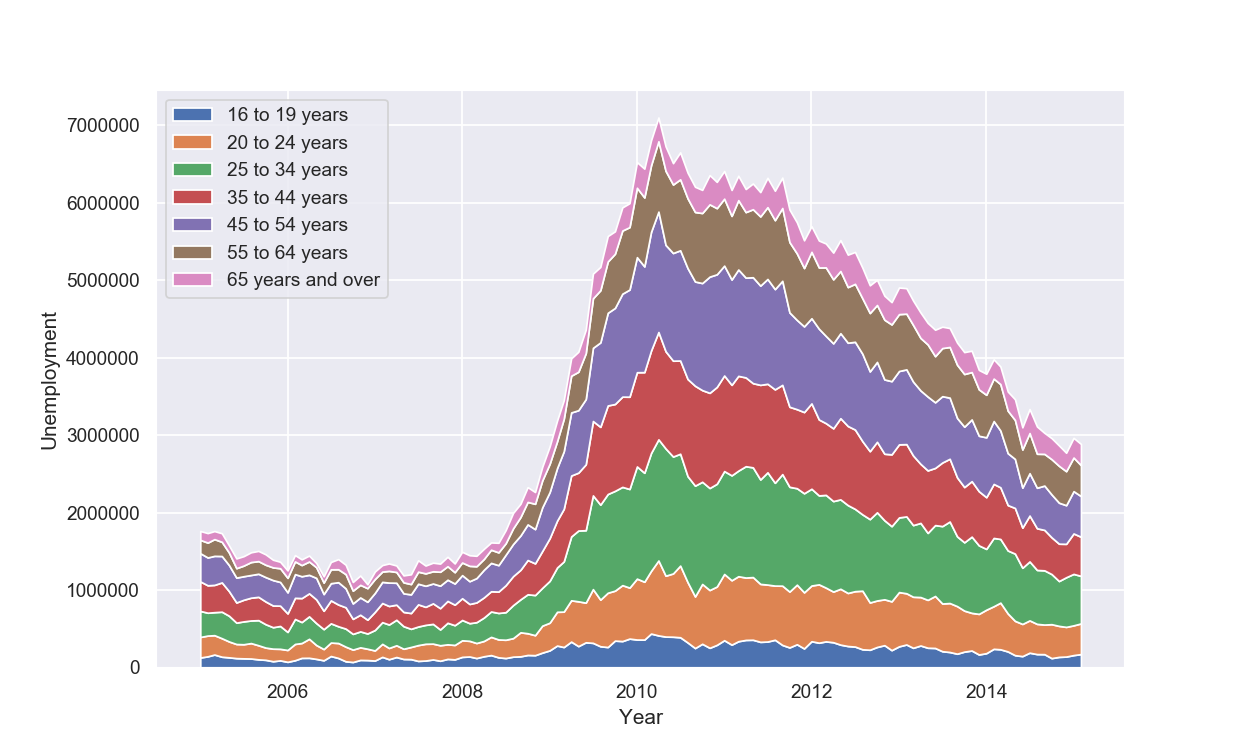

In [44]:
def problem2(filename):
    df= pd.read_excel(filename)
    df_grouped=df.groupby(["Age",'Period'],as_index=False).sum()
    
    sns.set()
    #list(set(df.Period))
    # Data
    plt.figure(figsize=(10,6))
    date=list(set(df.Period))
    
    x=sorted(date)
    y=[]
    
    for i in sorted(list(set(df_grouped.Age))):
        y.append(df_grouped[df_grouped["Age"]==i].Unemployed)
    labels=sorted(list(set(df_grouped.Age)))
    
    plt.stackplot(x,y, labels=labels)
    plt.legend(loc='upper left')
    plt.ylabel("Unemployment")
    plt.xlabel("Year")
    
    plt.show()
    
    
    
problem2("P1-Long-Term-Unemployment-Statistics.xlsx")

<IPython.core.display.Javascript object>


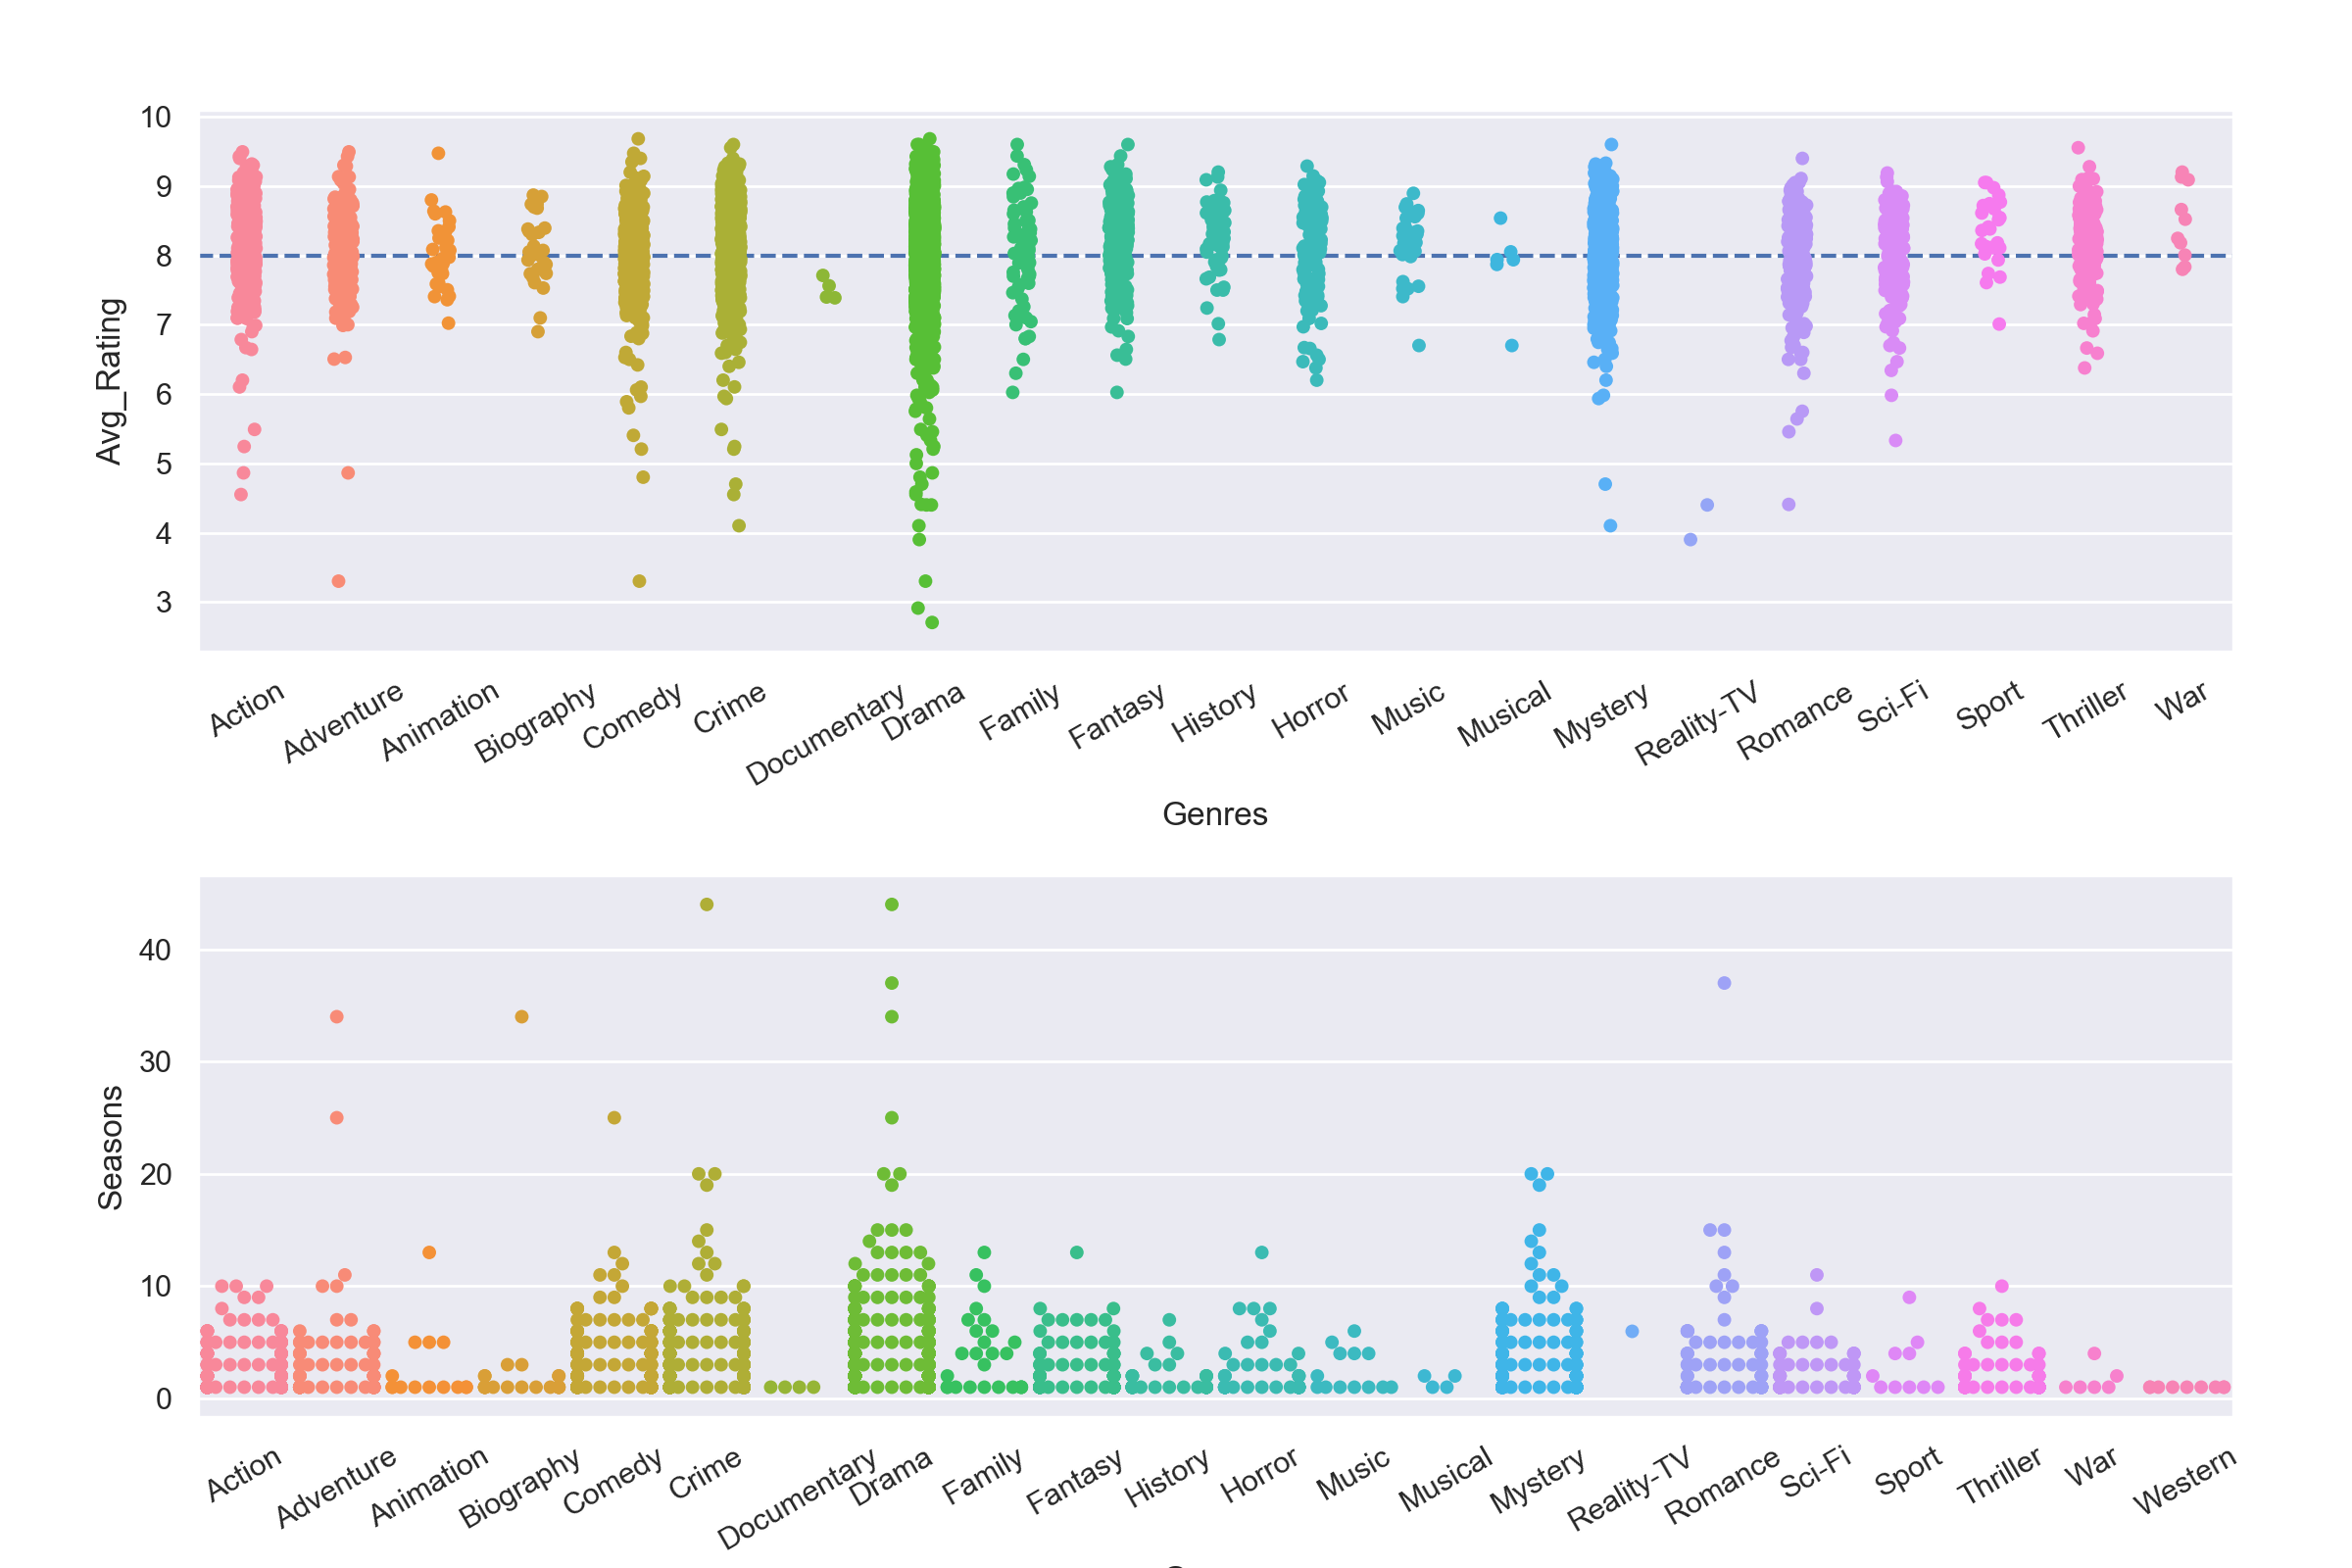

/Users/burak.isik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [7]:
def problem3():    
    df=pd.read_csv("IMDb_Economist_tv_ratings.csv")
    
    df.shape
    
    genres=[]
    for i in range(len(df)):
        genres.append(df.genres[i].split(","))
    
    lb = preprocessing.MultiLabelBinarizer()
    dummies= lb.fit_transform(genres)
    
    df_dummies=pd.DataFrame(dummies,columns=lb.classes_)
    
    for i in range(len(df_dummies.columns)):
        column=df_dummies.columns[i]
        df_dummies.iloc[:,i].replace(1, column,inplace=True)
    
    
    df_dummies["av_rating"]=df.av_rating
    
    data=df_dummies[df_dummies.iloc[:,0]!=0].iloc[:, [0,-1]]
    data.columns=["genres","avg_rating"]
    
    for i in range(1,len(df_dummies.columns)-2):   
        x=df_dummies[df_dummies.iloc[:,i]!=0].iloc[:, [i,-1]]
        x.columns=["genres","avg_rating"]
        data=pd.concat([data,x],ignore_index=True)
     
    
    
    data=df_dummies[df_dummies.iloc[:,0]!=0].iloc[:, [0,-1]]
    data.columns=["genres","avg_rating"]
    
    for i in range(1,len(df_dummies.columns)-2):   
        x=df_dummies[df_dummies.iloc[:,i]!=0].iloc[:, [i,-1]]
        x.columns=["genres","avg_rating"]
        data=pd.concat([data,x],ignore_index=True)
    
    
    sns.set(rc={'figure.figsize':(12,8)})
    
    f, axes = plt.subplots(2, 1)
    ax = sns.stripplot(x="genres", y="avg_rating", data=data,ax=axes[0])
    for item in ax.get_xticklabels():
        item.set_rotation(30)
        
    plt.tight_layout(pad=3, w_pad=2.0, h_pad=1.0)
    ax.set_xlabel("Genres")
    ax.set_ylabel("Avg_Rating")
    ax.axhline(8, color='b', linestyle='--')
    
    df_dummies["seasons"]=df.seasonNumber
    df_dummies["titleId"]=df.titleId
    
    
    df_max_seasons=df_dummies.loc[df_dummies.groupby('titleId')['seasons'].idxmax()]
    
    data=df_max_seasons[df_dummies.iloc[:,0]!=0].iloc[:, [0,-2]]
    data.columns=["genres","seasons"]
    
    for i in range(1,len(df_max_seasons.columns)-3):   
        x=df_max_seasons[df_max_seasons.iloc[:,i]!=0].iloc[:, [i,-2]]
        x.columns=["genres","seasons"]
        data=pd.concat([data,x],ignore_index=True)
    
    
    ax1 = sns.swarmplot(x="genres", y="seasons", data=data,ax=axes[1])
    ax1.set_xlabel("Genres")
    ax1.set_ylabel("Seasons")
    #ax1.set(yticks=range(0, 21,2))
    
    for item in ax1.get_xticklabels():
        item.set_rotation(30)
        
problem3()

<IPython.core.display.Javascript object>


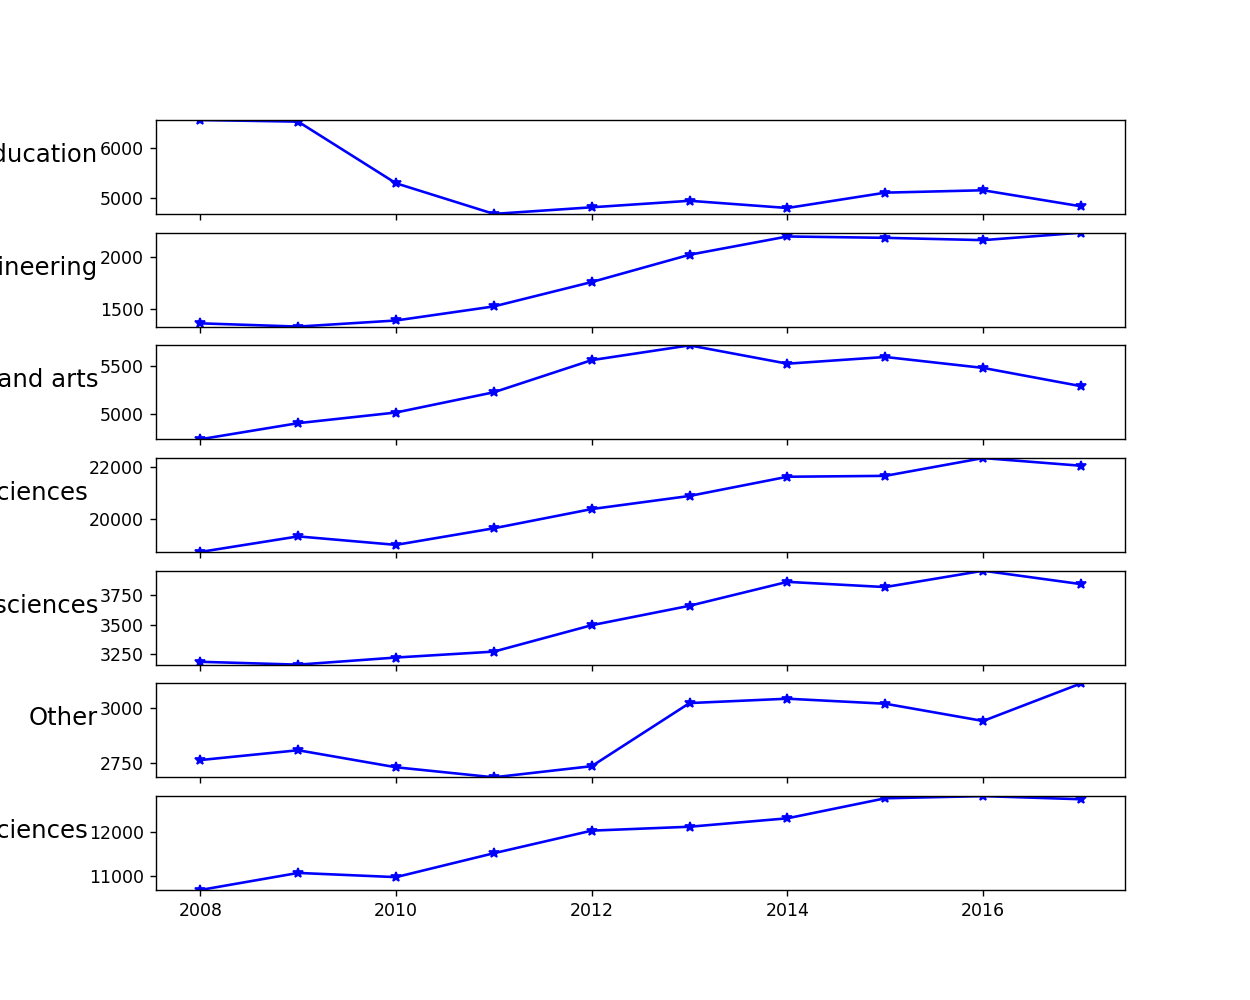

In [49]:
def problem4(link):    
    df=pd.read_csv(link)
    
    df_grouped=df.groupby(["broad_field","year"],as_index=False).sum()
    
    
    #plt.figure(figsize=(10,8))
    
    fields=sorted(list(set(df.broad_field)))
    year=sorted(list(set(df.year)))
    
    f, axes = plt.subplots(7, 1,figsize=(10,8))
    #f.tight_layout(pad=0.1)#, w_pad=20.0, h_pad=5.0)
    i=0
    
    for field in fields:
        axes[i].plot(df_grouped[df_grouped.broad_field==field].n_phds,'b-', marker='*')
        
        axes[i].set_ylabel(field,labelpad=1,horizontalalignment='right',fontsize=14).set_rotation(0)
        axes[i].set_xticklabels("")
        
        axes[i].set_ylim([min(df_grouped[df_grouped.broad_field==field].n_phds),max(df_grouped[df_grouped.broad_field==field].n_phds)])
        if i==6:
            axes[i].set_xticklabels(np.arange(2006, 2022, step=2))        
        
        i=i+1
        
    plt.show()
    
problem4("phd_by_field.csv")